<a href="https://colab.research.google.com/github/VoHuynhDuyThanh/AI/blob/main/Fuzzy_Ex1_Tip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

25.56900310279245


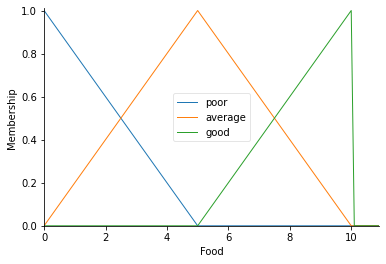

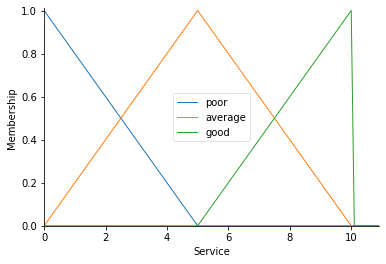

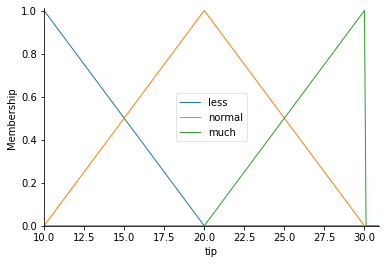

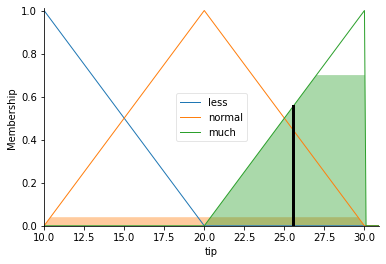

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0, 11, 0.1), 'Food')
Service = ctrl.Antecedent(np.arange(0, 11, 0.1), 'Service')
tip = ctrl.Consequent(np.arange(10, 31, 0.1), 'tip')
food['poor']=fuzz.trimf(food.universe, [0, 0, 5])
food['average']=fuzz.trimf(food.universe, [0, 5, 10])
food['good']=fuzz.trimf(food.universe, [5, 10, 10])
Service['poor']=fuzz.trimf(Service.universe, [0, 0, 5])
Service['average']=fuzz.trimf(Service.universe, [0, 5, 10])
Service['good']=fuzz.trimf(Service.universe, [5, 10, 10])
tip['less']=fuzz.trimf(tip.universe, [10, 10, 20])
tip['normal']=fuzz.trimf(tip.universe, [10, 20, 30])
tip['much']=fuzz.trimf(tip.universe, [20, 30, 30])
food.view()
Service.view()
tip.view()
rule1=ctrl.Rule(food['poor']&Service['poor'],tip['less'])
rule2=ctrl.Rule(food['poor']&Service['average'],tip['less'])
rule3=ctrl.Rule(food['average']&Service['poor'],tip['less'])
rule4=ctrl.Rule(food['good']&Service['poor'],tip['normal'])
rule5=ctrl.Rule(food['poor']&Service['good'],tip['normal'])
rule6=ctrl.Rule(food['average']&Service['average'],tip['normal'])
rule7=ctrl.Rule(food['average']&Service['good'],tip['much'])
rule8=ctrl.Rule(food['good']&Service['average'],tip['much'])
rule9=ctrl.Rule(food['good']&Service['good'],tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food'] = 6.5
tipping.input['Service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)
